# Нахождение остовного дерева минимального веса

Входные данные: 
1.	Связный граф не менее 50 вершин.
2.	Веса ребер в диапазоне от 1 до 10 случайным образом.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

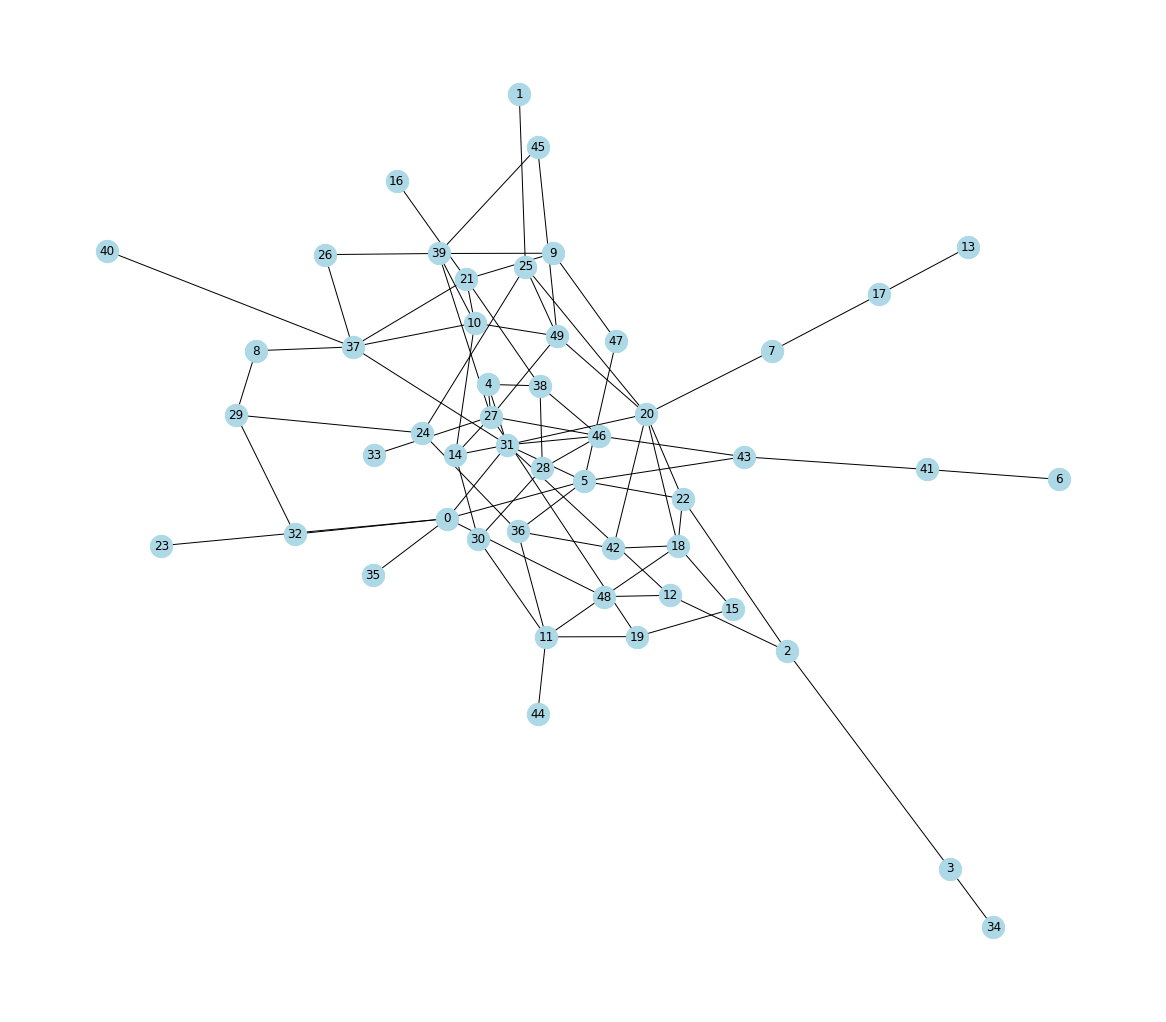

In [2]:
n = 50 # вершины
m = 80 # ребра

G = nx.gnm_random_graph(n, m)
subgraphs = list(nx.connected_components(G))

# Делаем граф связным
for part in subgraphs[1:]:
    G.add_edge(list(subgraphs[0])[0], list(part)[0])

# устанавливаем веса
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randint(1,10)

plt.figure(figsize = (16, 14))
pos = nx.spring_layout(G)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [3]:
# ребра и их веса    
def print_edges(G):
    list1, list2, list3 = [], [], []
    for i, e in enumerate(G.edges(data=True)):
        if i%3 == 0:
            list2.append(e)
        elif i%2 == 0:
            list1.append(e)
        else:
            list3.append(e)
    
    for i,j,z in zip(list1, list2, list3):
        print("(%s,%s) -> weight: (%s)  |  (%s,%s) -> weight: (%s)  |  (%s,%s) -> weight: (%s)" % (str(i[0]).rjust(2, " "), str(i[1]).ljust(2, " "), str(i[2]['weight']).center(2, " "), str(j[0]).rjust(2, " "), str(j[1]).ljust(2, " "), str(j[2]['weight']).center(2, " "), str(z[0]).rjust(2, " "), str(z[1]).ljust(2, " "), str(z[2]['weight']).center(2, " ")))

### Задача 1
1.	Построить остовное дерево минимального веса на графе, используя алгоритм Краскала.
2.	Визуализировать решение.


Для реализации данной задачи, воспользуемся методом minimum_spanning_tree, прописанным в библиотеке NetworkX.

In [4]:
# полученное остовное дерево минимального веса
G1 = nx.minimum_spanning_tree(G, weight='weight', algorithm='kruskal')
print_edges(G1)

( 0,32) -> weight: (4 )  |  ( 0,23) -> weight: (1 )  |  ( 0,48) -> weight: (2 )
( 1,25) -> weight: (2 )  |  ( 0,35) -> weight: (9 )  |  ( 2,3 ) -> weight: (1 )
( 3,34) -> weight: (8 )  |  ( 2,22) -> weight: (3 )  |  ( 2,12) -> weight: (3 )
( 5,31) -> weight: (2 )  |  ( 4,31) -> weight: (5 )  |  ( 5,43) -> weight: (3 )
( 7,17) -> weight: (8 )  |  ( 5,47) -> weight: (4 )  |  ( 6,41) -> weight: (4 )
( 8,29) -> weight: (5 )  |  ( 7,20) -> weight: (9 )  |  ( 9,39) -> weight: (4 )
(10,39) -> weight: (2 )  |  (10,37) -> weight: (1 )  |  (10,14) -> weight: (2 )
(11,19) -> weight: (3 )  |  (11,30) -> weight: (1 )  |  (11,44) -> weight: (8 )
(13,17) -> weight: (6 )  |  (12,31) -> weight: (2 )  |  (12,48) -> weight: (4 )
(16,21) -> weight: (4 )  |  (15,19) -> weight: (4 )  |  (18,22) -> weight: (2 )
(20,25) -> weight: (2 )  |  (19,27) -> weight: (1 )  |  (20,42) -> weight: (1 )
(21,38) -> weight: (5 )  |  (21,37) -> weight: (2 )  |  (24,29) -> weight: (2 )
(26,39) -> weight: (4 )  |  (24,25) -> w

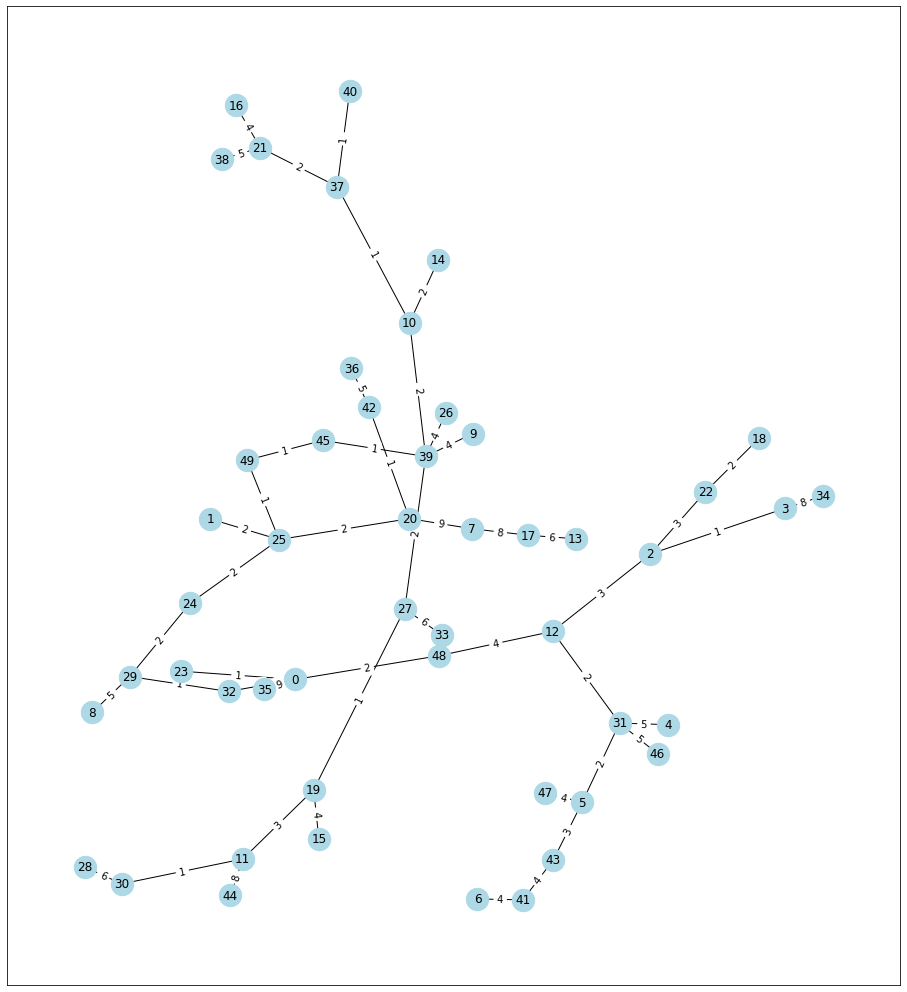

In [5]:
plt.figure(figsize=(16, 18))
pos = nx.spring_layout(G1)
labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx(G1, pos, node_color='lightblue', with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=labels)
print()

In [6]:
we = 0
for e in nx.get_edge_attributes(G1, 'weight'):
    we += G1[e[0]][e[1]]["weight"]
print('Вес:', we)

Вес: 168


In [7]:
len(G1.edges()) # количество ребер

49

### Задача 2
1.	Выбрать случайным образом 5 ребер графа и поменять их веса в диапазоне от 1 до 3. Построить остовное дерево минимального веса. Проверить как количественно и структурно изменилось решение.
2.	Визуализировать изменение решения.


In [8]:
# сделаем копию графа и будем работать с ней, чтобы легче определять изменения
G_ = G.copy()

In [9]:
# измененные веса пяти ребер графа
random_nodes = random.sample(list(G_.edges()), 5)
for e in random_nodes:
    if G_[e[0]][e[1]]['weight'] == 3:
        G_[e[0]][e[1]]['weight'] = random.randint(1,2)
    elif G_[e[0]][e[1]]['weight'] == 2:
        G_[e[0]][e[1]]['weight'] = 1
    elif G_[e[0]][e[1]]['weight'] == 1:
        G_[e[0]][e[1]]['weight'] = random.randint(2,3)
    else:
        G_[e[0]][e[1]]['weight'] = random.randint(1,3)
    print(f'({e[0]}, {e[1]}): {G[e[0]][e[1]]["weight"]} => {G_[e[0]][e[1]]["weight"] }')

(5, 43): 3 => 2
(15, 18): 8 => 3
(5, 36): 6 => 2
(13, 17): 6 => 3
(8, 29): 5 => 1


In [10]:
# полученное остовное дерево минимального веса
G2 = nx.minimum_spanning_tree(G_, weight='weight', algorithm='kruskal')
print_edges(G2)

( 0,32) -> weight: (4 )  |  ( 0,23) -> weight: (1 )  |  ( 0,48) -> weight: (2 )
( 1,25) -> weight: (2 )  |  ( 0,35) -> weight: (9 )  |  ( 2,3 ) -> weight: (1 )
( 3,34) -> weight: (8 )  |  ( 2,22) -> weight: (3 )  |  ( 2,12) -> weight: (3 )
( 5,43) -> weight: (2 )  |  ( 4,31) -> weight: (5 )  |  ( 5,31) -> weight: (2 )
( 6,41) -> weight: (4 )  |  ( 5,36) -> weight: (2 )  |  ( 5,47) -> weight: (4 )
( 7,20) -> weight: (9 )  |  ( 7,17) -> weight: (8 )  |  ( 8,29) -> weight: (1 )
(10,14) -> weight: (2 )  |  ( 9,39) -> weight: (4 )  |  (10,37) -> weight: (1 )
(11,30) -> weight: (1 )  |  (10,39) -> weight: (2 )  |  (11,19) -> weight: (3 )
(12,48) -> weight: (4 )  |  (11,44) -> weight: (8 )  |  (12,31) -> weight: (2 )
(15,18) -> weight: (3 )  |  (13,17) -> weight: (3 )  |  (16,21) -> weight: (4 )
(20,42) -> weight: (1 )  |  (18,22) -> weight: (2 )  |  (19,27) -> weight: (1 )
(21,37) -> weight: (2 )  |  (20,25) -> weight: (2 )  |  (21,38) -> weight: (5 )
(25,49) -> weight: (1 )  |  (24,29) -> w

Проверяем, как количественно и структурно изменилось решение.

In [11]:
print(f'Количественное изменение: \n\n{len(G1.edges())} => {len(G2.edges())}\n')

print(f'Исчезли ребра: \n')
for i in G1.edges():
    if not i in G2.edges():
        print(i)
        
print()

print(f'Появились ребра: \n')
for i in G2.edges():
    if not i in G1.edges():
        print(i)
    
print()
we = 0
for e in nx.get_edge_attributes(G2, 'weight'):
    we += G2[e[0]][e[1]]["weight"]
print('Вес:', we)

Количественное изменение: 

49 => 49

Исчезли ребра: 

(15, 19)
(36, 42)

Появились ребра: 

(5, 36)
(15, 18)

Вес: 156


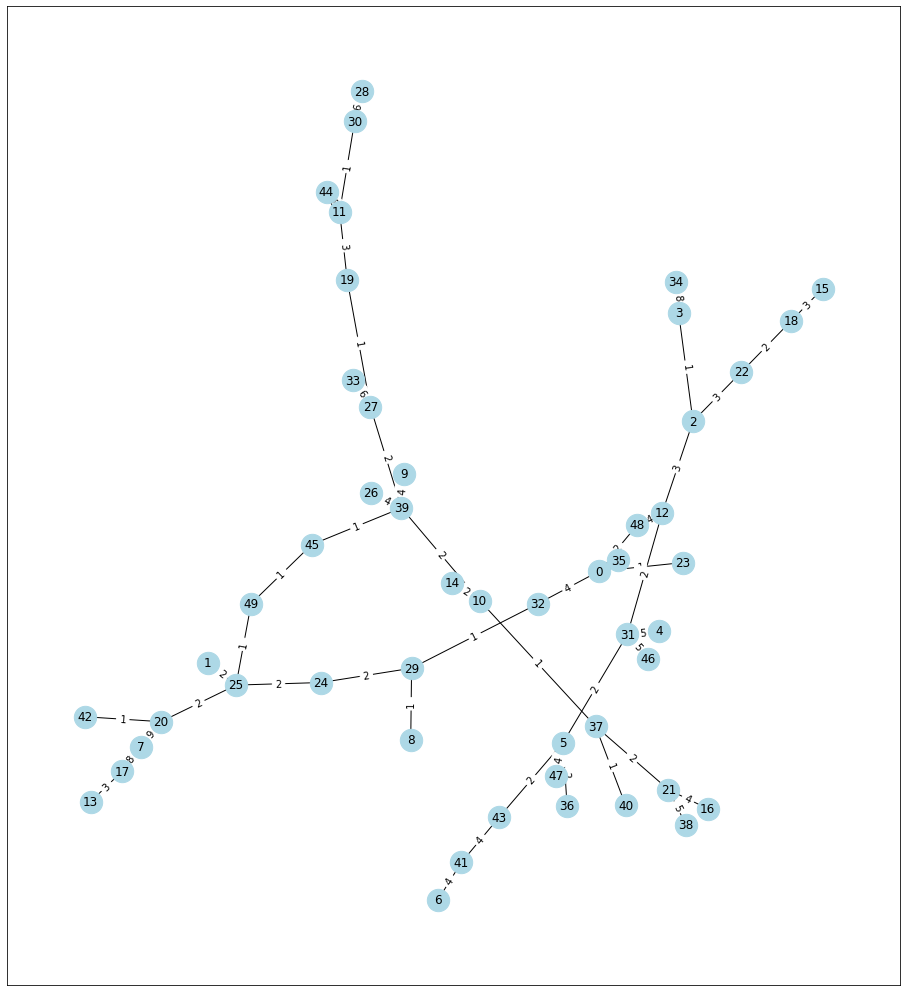

In [12]:
# полученный граф
plt.figure(figsize=(16, 18))
pos = nx.spring_layout(G2)
labels = nx.get_edge_attributes(G2, "weight")
nx.draw_networkx(G2, pos, node_color='lightblue', with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G2, pos=pos, edge_labels=labels)
print()

### Задача 3
1.	Провести 30 итераций задачи 2.
2.	Построить график изменения количественного и структурного изменения.


In [13]:
num_changes = []
structure_add = []
structure_lost = []
weight = []

for _ in range(30): 
    random_nodes = random.sample(list(G1.edges()), 5)
    print('Итерация ', _ + 1)
    for e in random_nodes:
        G_[e[0]][e[1]]['weight'] = random.randint(1,3)
        print(f'({e[0]}, {e[1]}): {G[e[0]][e[1]]["weight"]} => {G_[e[0]][e[1]]["weight"] }')
    print()
    G3 = nx.minimum_spanning_tree(G_, weight='weight', 
                                  algorithm='kruskal')
    
    #фиксируем изменения
    num_changes.append(len(G3.edges()))
    
    we = 0
    for e in nx.get_edge_attributes(G3, 'weight'):
        we += G3[e[0]][e[1]]["weight"]
    weight.append(we)
    structure_lost_, structure_add_ = 0, 0
    for i in G2.edges():
        if not i in G3.edges():
            structure_lost_ += 1
    print()
    for i in G3.edges():
        if not i in G2.edges():
            structure_add_ += 1  
    structure_lost.append(structure_lost_)
    structure_add.append(structure_add_) 
    print()

Итерация  1
(26, 39): 4 => 1
(8, 29): 5 => 1
(12, 31): 2 => 3
(11, 44): 8 => 3
(10, 39): 2 => 2



Итерация  2
(2, 3): 1 => 2
(0, 32): 4 => 1
(37, 40): 1 => 1
(5, 43): 3 => 1
(39, 45): 1 => 2



Итерация  3
(5, 43): 3 => 3
(5, 47): 4 => 3
(11, 30): 1 => 2
(0, 32): 4 => 3
(7, 17): 8 => 2



Итерация  4
(0, 32): 4 => 1
(24, 29): 2 => 1
(27, 33): 6 => 3
(25, 49): 1 => 3
(24, 25): 2 => 3



Итерация  5
(0, 32): 4 => 1
(7, 20): 9 => 3
(21, 38): 5 => 2
(1, 25): 2 => 1
(9, 39): 4 => 3



Итерация  6
(45, 49): 1 => 3
(27, 39): 2 => 1
(10, 39): 2 => 1
(12, 31): 2 => 2
(6, 41): 4 => 3



Итерация  7
(5, 47): 4 => 3
(2, 12): 3 => 1
(16, 21): 4 => 1
(31, 46): 5 => 1
(29, 32): 1 => 3



Итерация  8
(2, 3): 1 => 2
(9, 39): 4 => 2
(27, 33): 6 => 2
(19, 27): 1 => 3
(31, 46): 5 => 3



Итерация  9
(26, 39): 4 => 3
(39, 45): 1 => 1
(45, 49): 1 => 1
(11, 19): 3 => 2
(2, 12): 3 => 3



Итерация  10
(0, 48): 2 => 3
(37, 40): 1 => 2
(45, 49): 1 => 3
(2, 22): 3 => 2
(10, 37): 1 => 3



Итерация  11
(5, 43): 

In [14]:
structure_lost == structure_add

True

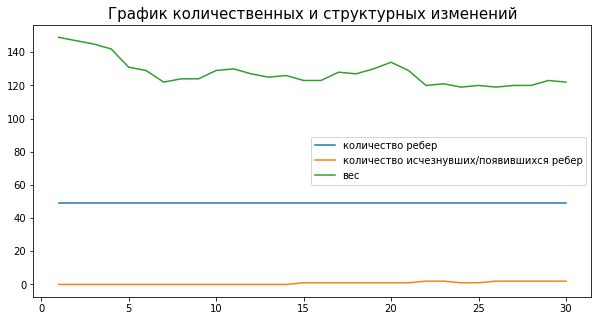

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(range(1, 31), num_changes, label = 'количество ребер')
ax.plot(range(1, 31), structure_lost, 
        label = 'количество исчезнувших/появившихся ребер')
ax.plot(range(1, 31), weight, label = 'вес')

ax.legend()

plt.title('График количественных и структурных изменений', {'fontsize': 15})
plt.show()

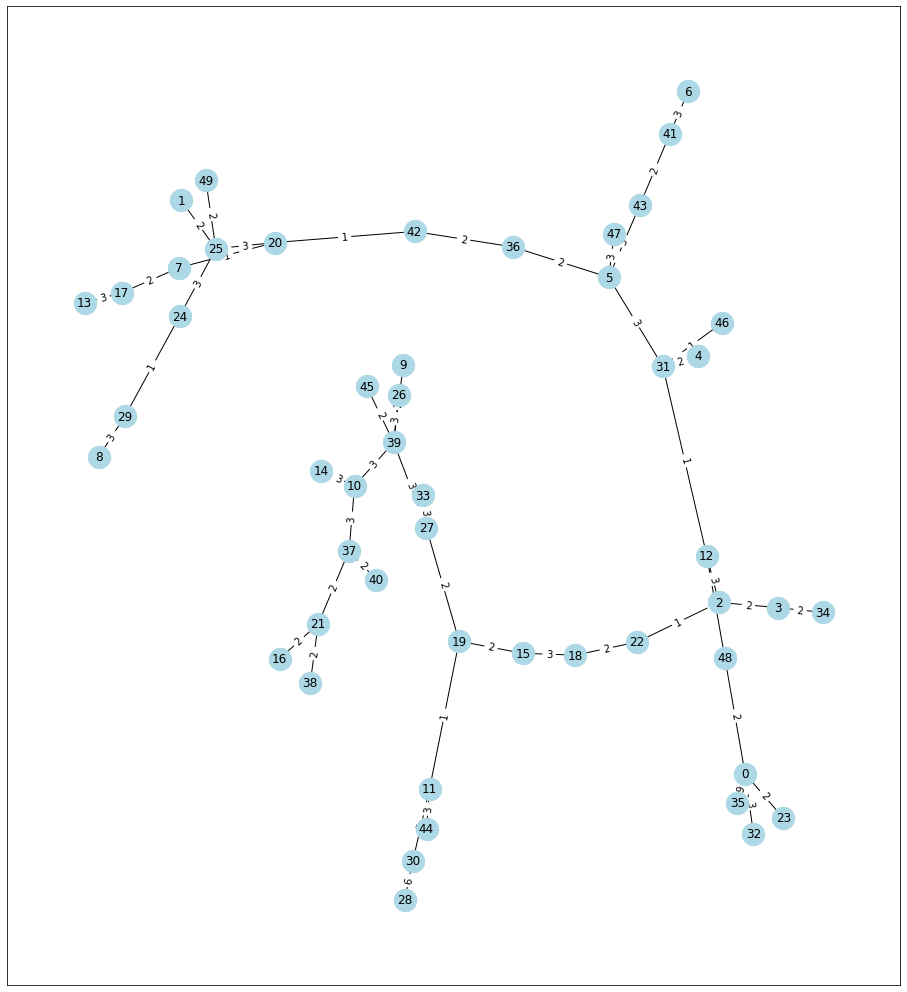

In [16]:
# финальный граф в этом задании
plt.figure(figsize=(16, 18))
pos = nx.spring_layout(G3)
labels = nx.get_edge_attributes(G3, "weight")
nx.draw_networkx(G3, pos, node_color='lightblue', with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=labels)
print()

### Задача 4
1.	Решить Задачу 3, меняя диапазон изменения весов. Т.е. заменив диапазон от 1 до 3 на другой.
2.	Провести сравнение (анализ) результатов с задачей 3.


In [17]:
num_changes4 = []
structure_add4 = []
structure_lost4 = []
weight4 = []

for _ in range(30): 
    random_nodes = random.sample(list(G1.edges()), 5)
    print('Итерация ', _ + 1)
    for e in random_nodes:
        G_[e[0]][e[1]]['weight'] = random.randint(5,7)
        print(f'({e[0]}, {e[1]}): {G[e[0]][e[1]]["weight"]} => {G_[e[0]][e[1]]["weight"] }')
    print()
    G4 = nx.minimum_spanning_tree(G_, weight='weight', algorithm='kruskal')
    
    #фиксируем изменения
    num_changes4.append(len(G4.edges()))
    
    we = 0
    for e in nx.get_edge_attributes(G4, 'weight'):
        we += G4[e[0]][e[1]]["weight"]
    weight4.append(we)
    structure_lost_, structure_add_ = 0, 0
    for i in G2.edges():
        if not i in G4.edges():
            structure_lost_ += 1
    print()
    for i in G4.edges():
        if not i in G2.edges():
            structure_add_ += 1  
    structure_lost4.append(structure_lost_)
    structure_add4.append(structure_add_) 
    print()

Итерация  1
(7, 17): 8 => 6
(24, 29): 2 => 6
(20, 42): 1 => 7
(6, 41): 4 => 5
(41, 43): 4 => 7



Итерация  2
(20, 25): 2 => 7
(45, 49): 1 => 7
(15, 19): 4 => 6
(11, 30): 1 => 5
(6, 41): 4 => 6



Итерация  3
(6, 41): 4 => 5
(11, 19): 3 => 7
(0, 32): 4 => 6
(21, 37): 2 => 7
(41, 43): 4 => 7



Итерация  4
(19, 27): 1 => 5
(9, 39): 4 => 7
(27, 33): 6 => 6
(11, 19): 3 => 6
(20, 25): 2 => 6



Итерация  5
(8, 29): 5 => 6
(0, 48): 2 => 5
(29, 32): 1 => 6
(28, 30): 6 => 5
(27, 39): 2 => 6



Итерация  6
(28, 30): 6 => 6
(21, 38): 5 => 5
(16, 21): 4 => 5
(27, 33): 6 => 7
(0, 35): 9 => 6



Итерация  7
(20, 42): 1 => 6
(16, 21): 4 => 5
(45, 49): 1 => 6
(5, 47): 4 => 5
(12, 31): 2 => 7



Итерация  8
(0, 23): 1 => 6
(11, 44): 8 => 7
(12, 48): 4 => 5
(16, 21): 4 => 7
(4, 31): 5 => 5



Итерация  9
(9, 39): 4 => 7
(21, 38): 5 => 6
(8, 29): 5 => 6
(27, 33): 6 => 7
(25, 49): 1 => 6



Итерация  10
(7, 17): 8 => 6
(16, 21): 4 => 6
(5, 31): 2 => 5
(20, 42): 1 => 6
(9, 39): 4 => 5



Итерация  11
(20

In [18]:
structure_lost == structure_add

True

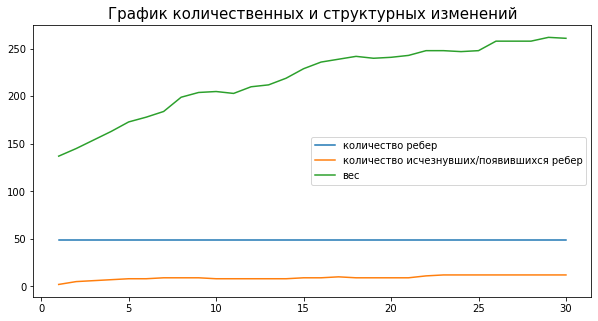

In [19]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(range(1, 31), num_changes4, label = 'количество ребер')
ax.plot(range(1, 31), structure_lost4, label = 'количество исчезнувших/появившихся ребер')
ax.plot(range(1, 31), weight4, label = 'вес')

ax.legend()

plt.title('График количественных и структурных изменений', {'fontsize': 15})
plt.show()

In [20]:
print(len(G4.edges()))

49


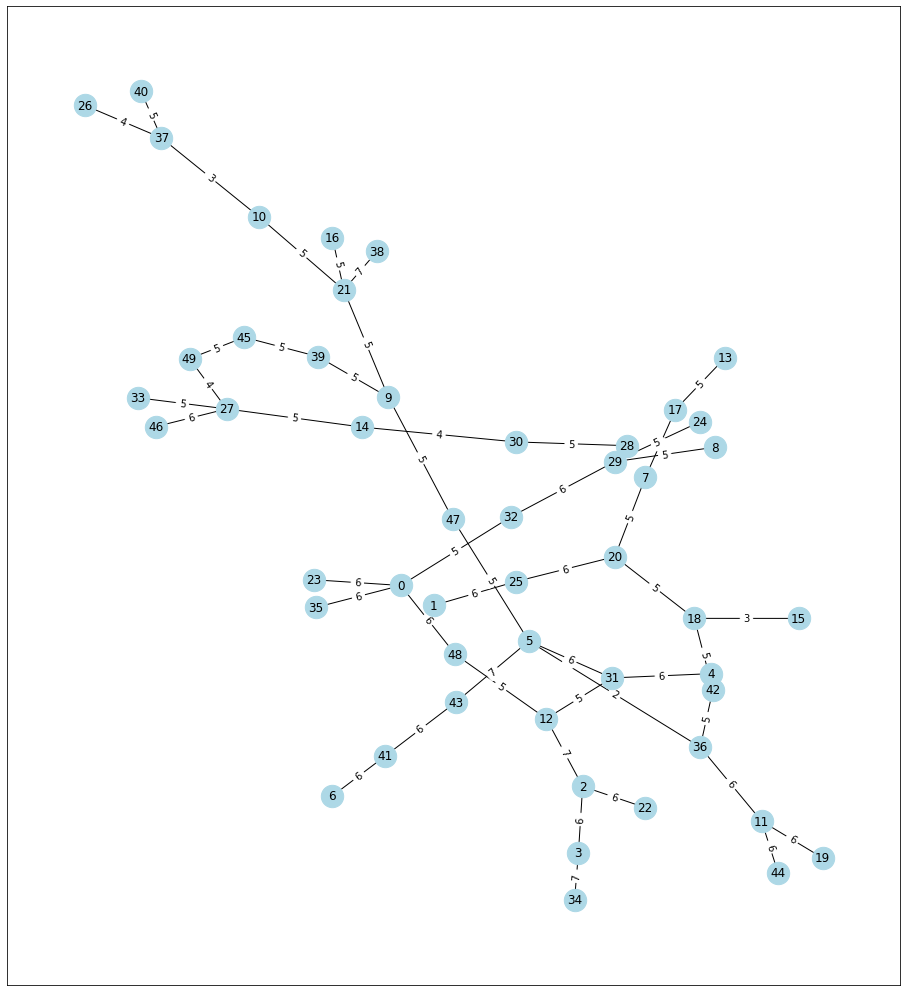

In [21]:

# финальный граф
plt.figure(figsize=(16, 18))
pos = nx.spring_layout(G4)
labels = nx.get_edge_attributes(G4, "weight")
nx.draw_networkx(G4, pos, node_color='lightblue', with_labels=True, 
        node_size=500)
nx.draw_networkx_edge_labels(G4, pos=pos, edge_labels=labels)
print()